In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


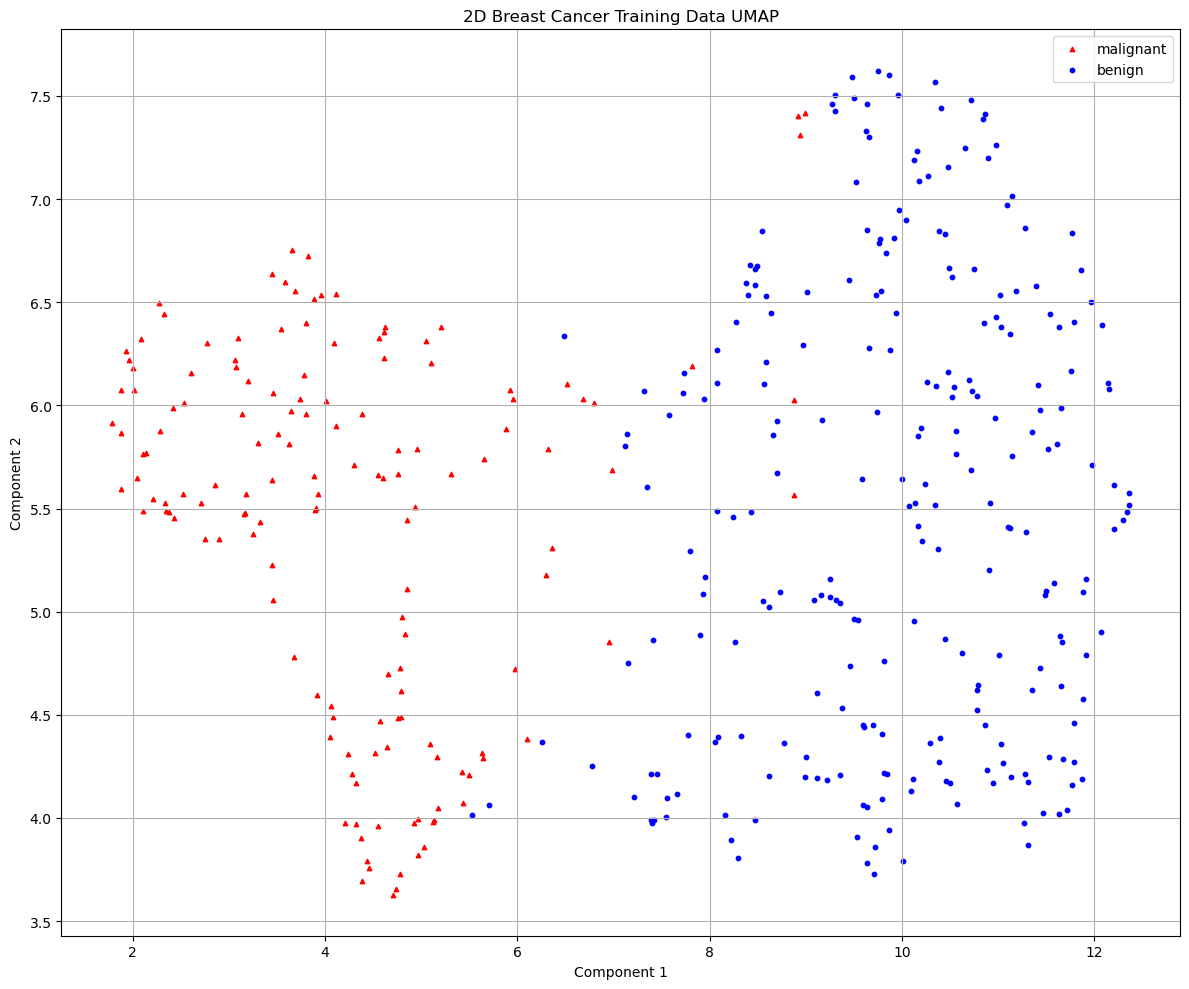

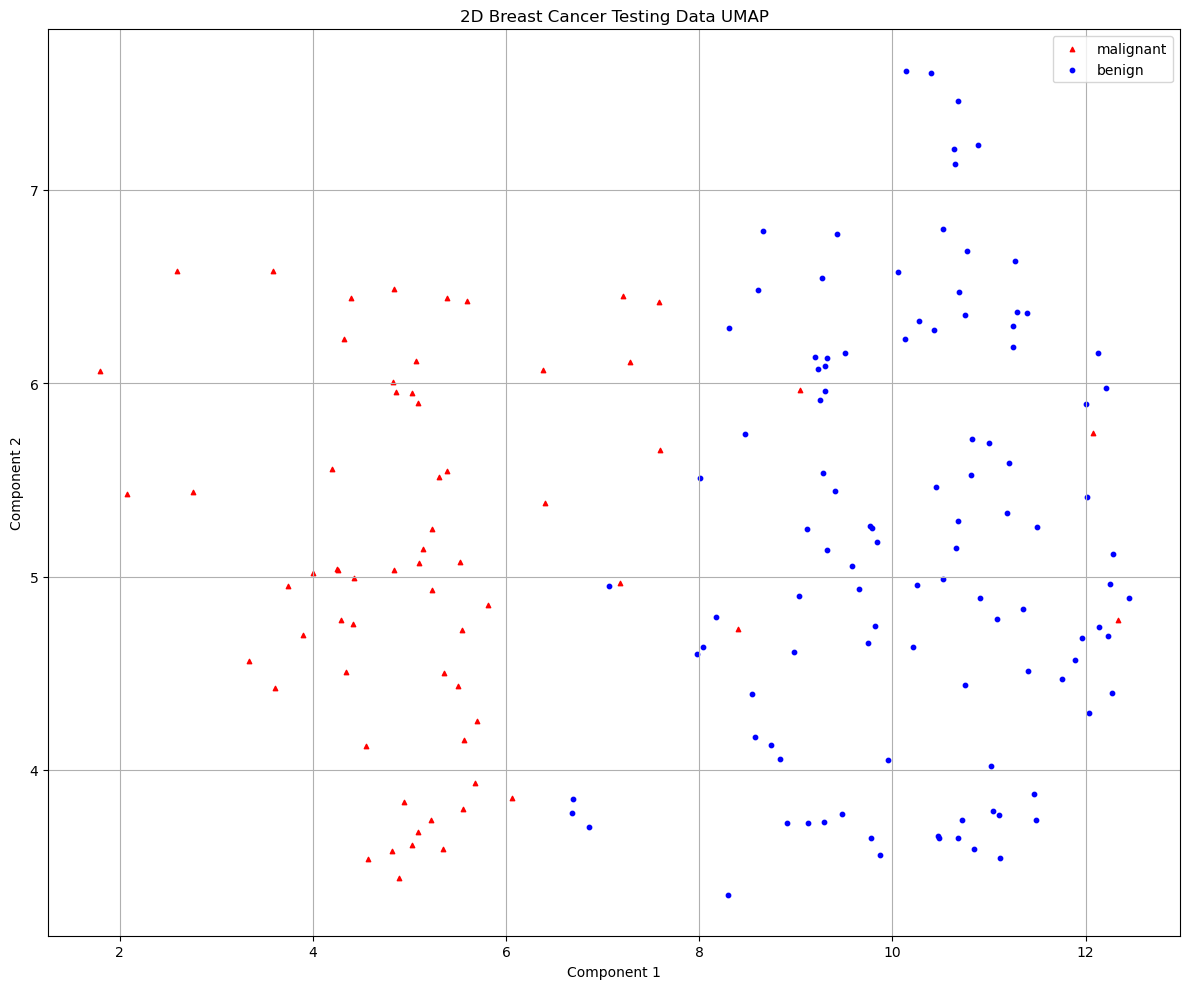

[I 2025-04-27 02:58:57,679] A new study created in memory with name: no-name-e456a19b-261f-4245-b7a4-dbd7ecf9c5e1
[I 2025-04-27 02:58:57,839] Trial 0 finished with value: 0.9749683544303798 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 40, 'p': 1}. Best is trial 0 with value: 0.9749683544303798.
[I 2025-04-27 02:58:57,993] Trial 1 finished with value: 0.9698417721518988 and parameters: {'n_neighbors': 23, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 42, 'p': 2}. Best is trial 0 with value: 0.9749683544303798.
[I 2025-04-27 02:58:58,147] Trial 2 finished with value: 0.9774367088607594 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 50, 'p': 1}. Best is trial 2 with value: 0.9774367088607594.
[I 2025-04-27 02:58:58,359] Trial 3 finished with value: 0.9647784810126583 and parameters: {'n_neighbors': 30, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 49, 'p': 1}. Best is 

Best trial:
Accuracy: 0.9799050632911392
Best hyperparameters:  {'n_neighbors': 8, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 43, 'p': 2}


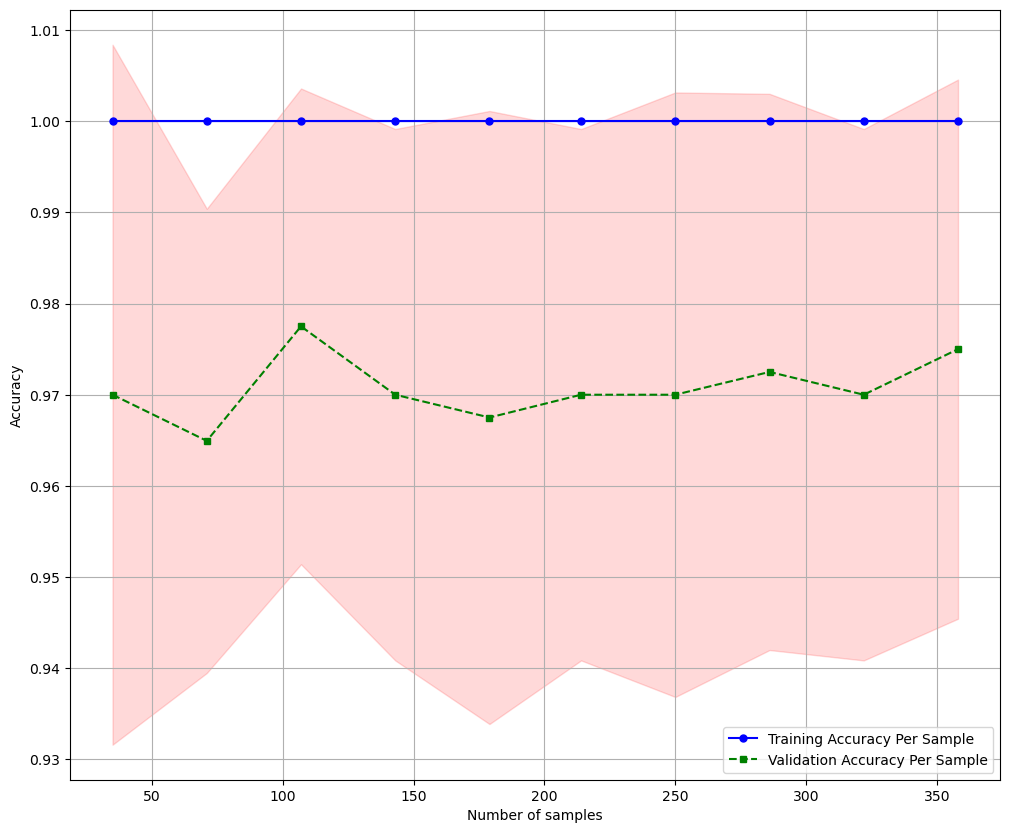

Confusion Matrix
[[ 55   9]
 [  1 106]]
Accuracy: 0.9415, Precision: 0.9217, Recall: 0.9907, F1: 0.9550, AUC:0.9626


In [3]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(X_train_scaled, X_test_scaled, y_train, y_test, 'umap', {})

helper.train_and_evaluate_model('lgbm', X_train_feature_extracted, X_test_feature_extracted, y_train, y_test)